In [ ]:
import os
import zipfile
import subprocess
import shutil

# Step 1: Set Kaggle API Key location
kaggle_json_path = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_json_path, exist_ok=True)

# NOTE: Adjust this if your kaggle.json is in the notebook folder
local_kaggle_json = "kaggle.json"

if not os.path.exists(local_kaggle_json):
    raise FileNotFoundError("⚠️ kaggle.json not found in the notebook directory!")

# Move kaggle.json to ~/.kaggle and set permissions
shutil.copy(local_kaggle_json, os.path.join(kaggle_json_path, "kaggle.json"))
os.chmod(os.path.join(kaggle_json_path, "kaggle.json"), 0o600)

# Step 2: Create data directory
data_path = "../data/breakhis"  # Going one level up from notebooks/
os.makedirs(data_path, exist_ok=True)

# Step 3: Run Kaggle CLI to download and unzip
subprocess.run([
    "kaggle", "datasets", "download",
    "-d", "ambarish/breakhis",
    "-p", data_path,
    "--unzip"
], check=True)


In [2]:
pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]━━━━━━━━━━━ 2/3 [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pil install matplotlib

SyntaxError: invalid syntax (1187855109.py, line 1)

In [3]:
import os
import pandas as pd
from glob import glob

# Set dataset root path
dataset_root = "../data/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"

# Sanity check
if not os.path.exists(dataset_root):
    raise FileNotFoundError(f"❌ Dataset path not found: {dataset_root}")

# Get all image paths (recursive across magnifications)
image_paths = glob(os.path.join(dataset_root, "*", "*", "*", "*", "*", "*.png"))
print(f"🔍 Found {len(image_paths)} .png files")


# Parse image paths to extract metadata
data = []

for path in image_paths:
    parts = path.split(os.sep)
    try:
        label_type = parts[-6]         # 'malignant' or 'benign'
        subclass = parts[-4]           # e.g. 'mucinous_carcinoma'
        magnification = parts[-2]      # e.g. '100X'
        filename = os.path.basename(path)

        data.append({
            "path": path,
            "label_type": label_type,
            "subclass": subclass,
            "magnification": magnification,
            "filename": filename
        })
    except IndexError:
        print(f"❗ Skipping malformed path: {path}")

# Convert to DataFrame
metadata = pd.DataFrame(data)

# Display basic metadata
print("\n✅ Sample entries:")
print(metadata.head())

print("\n📊 Subclass distribution:")
print(metadata["subclass"].value_counts())

print("\n🔬 Magnification distribution:")
print(metadata["magnification"].value_counts())

print("\n🏷️ Label type distribution:")
print(metadata["label_type"].value_counts())


🔍 Found 7909 .png files

✅ Sample entries:
                                                path label_type  \
0  ../data/breakhis/BreaKHis_v1/BreaKHis_v1/histo...  malignant   
1  ../data/breakhis/BreaKHis_v1/BreaKHis_v1/histo...  malignant   
2  ../data/breakhis/BreaKHis_v1/BreaKHis_v1/histo...  malignant   
3  ../data/breakhis/BreaKHis_v1/BreaKHis_v1/histo...  malignant   
4  ../data/breakhis/BreaKHis_v1/BreaKHis_v1/histo...  malignant   

             subclass magnification                         filename  
0  mucinous_carcinoma          100X  SOB_M_MC-14-13418DE-100-009.png  
1  mucinous_carcinoma          100X  SOB_M_MC-14-13418DE-100-008.png  
2  mucinous_carcinoma          100X  SOB_M_MC-14-13418DE-100-003.png  
3  mucinous_carcinoma          100X  SOB_M_MC-14-13418DE-100-002.png  
4  mucinous_carcinoma          100X  SOB_M_MC-14-13418DE-100-014.png  

📊 Subclass distribution:
subclass
ductal_carcinoma       3451
fibroadenoma           1014
mucinous_carcinoma      792
lobular_c

In [6]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.4 MB/s eta 0:00:001.3 MB/s eta 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]ourpy]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install sklearn

  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
   

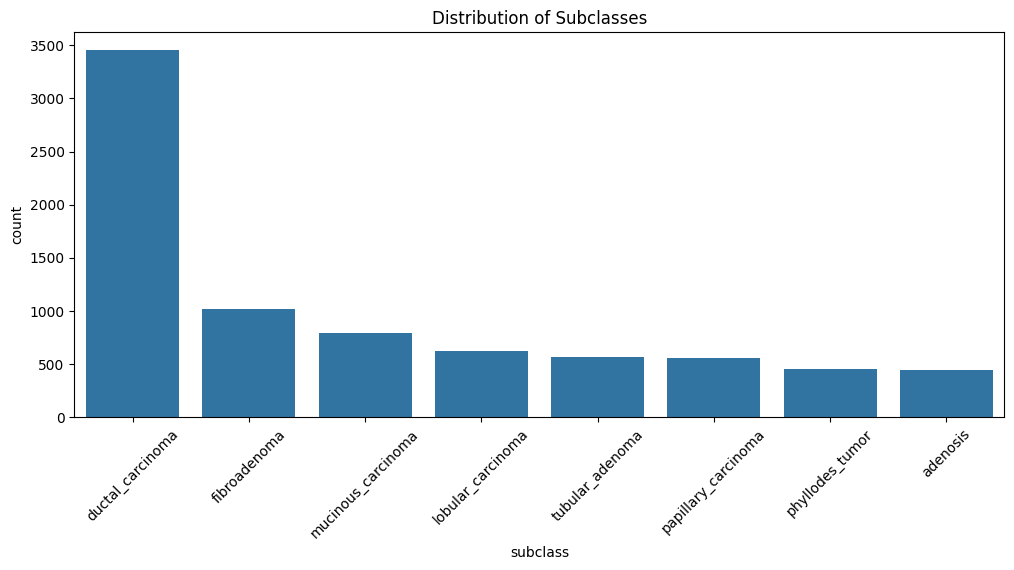

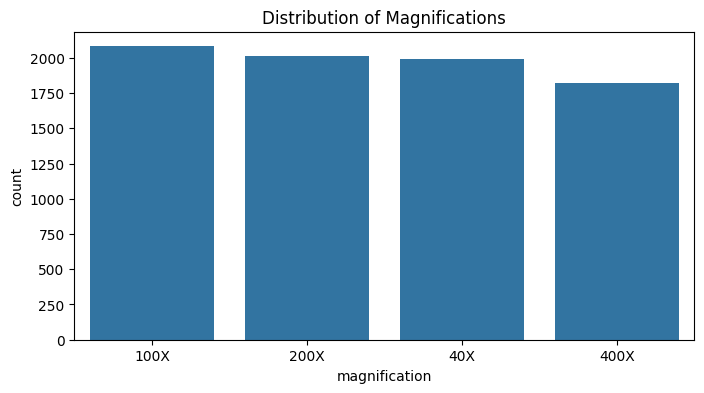

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot subclass distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=metadata, x="subclass", order=metadata["subclass"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Subclasses")
plt.show()

# Plot magnification distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=metadata, x="magnification", order=metadata["magnification"].value_counts().index)
plt.title("Distribution of Magnifications")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Extract patient ID
def extract_patient_id(path):
    filename = os.path.basename(path)
    return filename.split("_")[2]

metadata["patient_id"] = metadata["path"].apply(extract_patient_id)

# Get unique patient per subclass
unique_patients = metadata[["patient_id", "subclass"]].drop_duplicates()

# Train-test-val split (stratified on subclass)
train_ids, test_ids = train_test_split(
    unique_patients,
    test_size=0.15,
    stratify=unique_patients["subclass"],
    random_state=42
)

train_ids, val_ids = train_test_split(
    train_ids,
    test_size=0.15 / 0.85,
    stratify=train_ids["subclass"],
    random_state=42
)

# Map to full metadata
train_df = metadata[metadata["patient_id"].isin(train_ids["patient_id"])]
val_df = metadata[metadata["patient_id"].isin(val_ids["patient_id"])]
test_df = metadata[metadata["patient_id"].isin(test_ids["patient_id"])]


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import numpy as np
import torch
from collections import Counter

# 1. Count training examples per class
class_counts = Counter(train_df["subclass"])
classes = sorted(class_counts.keys())  # Ensure consistent order

# 2. Create mappings
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

# 3. Safely map class labels to indices in all splits
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()

train_df.loc[:, "class_idx"] = train_df["subclass"].map(class_to_idx)
val_df.loc[:, "class_idx"] = val_df["subclass"].map(class_to_idx)
test_df.loc[:, "class_idx"] = test_df["subclass"].map(class_to_idx)

# 4. Compute class weights = inverse frequency
total = sum(class_counts.values())
class_weights = np.array([total / class_counts[cls] for cls in classes], dtype=np.float32)

# 5. Normalize to sum to 1
class_weights = class_weights / class_weights.sum()

# 6. Convert to PyTorch tensor
class_weights_tensor = torch.FloatTensor(class_weights)

# 7. Print for confirmation
print("Class to Index Mapping:", class_to_idx)
print("Class Weights Tensor:", class_weights_tensor)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot function
def plot_split_distribution(df_list, df_names, label_col="subclass"):
    fig, axes = plt.subplots(1, len(df_list), figsize=(18, 4), sharey=True)
    for i, (df, name) in enumerate(zip(df_list, df_names)):
        sns.countplot(data=df, x=label_col, order=sorted(df[label_col].unique()), ax=axes[i])
        axes[i].set_title(f"{name} Set")
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_split_distribution(
    [train_df, val_df, test_df],
    ["Train", "Validation", "Test"]
)


In [ ]:
from torch.utils.data import WeightedRandomSampler

# Get the sample weights for each image in the training dataset
sample_weights = train_df["class_idx"].map(lambda x: float(class_weights_tensor[x])).values.astype(np.float32)

# Create the sampler
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),  # Keep it same as dataset length
    replacement=True
)

# Now you're ready to use this sampler in your DataLoader


In [7]:
import os
import torch
import random
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

# 1. Reproducibility
def seed_all(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_all(42)

# 2. Image transforms
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# 3. Custom Dataset
class BreakHisDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label = self.df.loc[idx, "class_idx"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label, img_path  # also return path for debugging

# 4. Weighted Sampling
sample_weights = train_df["class_idx"].map(lambda x: class_weights_tensor[x]).astype(float).values
sampler = WeightedRandomSampler(
    weights=torch.tensor(sample_weights, dtype=torch.double),
    num_samples=len(sample_weights),
    replacement=True
)

# 5. Create datasets
train_dataset = BreakHisDataset(train_df, transform=train_transform)
val_dataset   = BreakHisDataset(val_df,   transform=test_transform)
test_dataset  = BreakHisDataset(test_df,  transform=test_transform)

# 6. DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, 
                          num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                        num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, 
                         num_workers=0, pin_memory=True)


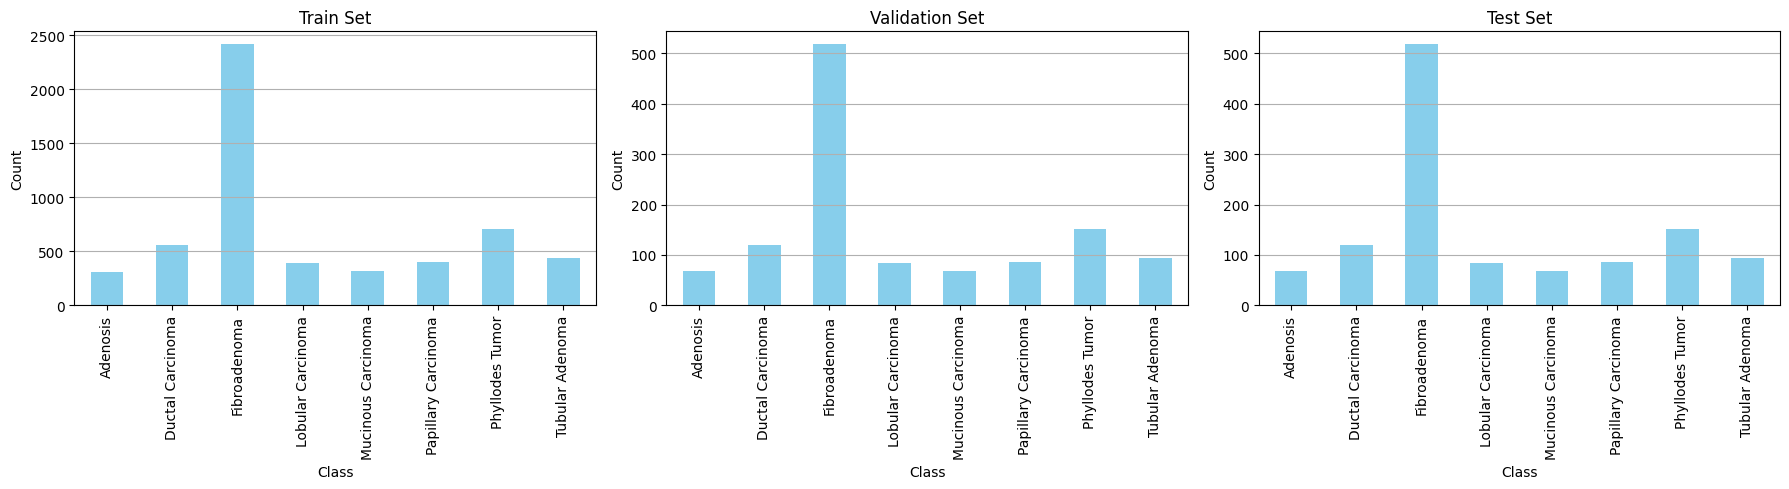

In [9]:
import matplotlib.pyplot as plt

# Mapping of class_idx to readable class labels
class_names = {
    0: "Adenosis",
    1: "Fibroadenoma",
    2: "Phyllodes Tumor",
    3: "Tubular Adenoma",
    4: "Ductal Carcinoma",
    5: "Lobular Carcinoma",
    6: "Mucinous Carcinoma",
    7: "Papillary Carcinoma"
}

# Add 'class_label' column to each split
for df in [train_df, val_df, test_df]:
    df["class_label"] = df["class_idx"].map(class_names)

# Plotting function
def plot_class_distribution(df, title, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))

    class_counts = df["class_label"].value_counts().sort_index()
    class_counts.plot(kind="bar", ax=ax, color="skyblue")
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.grid(axis="y")

# Plot all splits side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_class_distribution(train_df, "Train Set", ax=axes[0])
plot_class_distribution(val_df,   "Validation Set", ax=axes[1])
plot_class_distribution(test_df,  "Test Set", ax=axes[2])
plt.tight_layout()
plt.show()


In [16]:
from torchvision import models
import torch.nn as nn

# Load EfficientNetB0
model = models.efficientnet_b0(pretrained=True)

# Modify classifier to match number of classes
num_classes = train_df["class_idx"].nunique()
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)


/Users/mac/breast-cancer-thesis/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mac/breast-cancer-thesis/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
from torchvision import models
from torchvision.models import EfficientNet_B0_Weights
import torch.nn as nn

# Load EfficientNetB0 with pre-trained weights
weights = EfficientNet_B0_Weights.DEFAULT
model = models.efficientnet_b0(weights=weights)

# Modify classifier to match number of classes
num_classes = train_df["class_idx"].nunique()
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)


KeyboardInterrupt: 

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [19]:
import torch.nn.functional as F
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [20]:
from tqdm import tqdm
import copy

num_epochs = 10  # you can increase later
best_val_acc = 0.0
best_model_wts = copy.deepcopy(model.state_dict())

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    # ---------- Training ----------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels, _ in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / total
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    print(f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}")

    # ---------- Validation ----------
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels, _ in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # ---------- Save best model ----------
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        print("✅ Best model updated!")

# ---------- Load best weights ----------
model.load_state_dict(best_model_wts)
print(f"\nBest Validation Accuracy: {best_val_acc:.4f}")



Epoch 1/10
------------------------------


100%|██████████| 173/173 [26:41<00:00,  9.25s/it]


Train Loss: 1.4059, Train Acc: 0.5400
Val Loss: 0.9829, Val Acc: 0.6563
✅ Best model updated!

Epoch 2/10
------------------------------


100%|██████████| 173/173 [50:53<00:00, 17.65s/it]   


Train Loss: 0.6171, Train Acc: 0.7948
Val Loss: 0.5403, Val Acc: 0.8003
✅ Best model updated!

Epoch 3/10
------------------------------


100%|██████████| 173/173 [34:01<00:00, 11.80s/it]


Train Loss: 0.3748, Train Acc: 0.8744
Val Loss: 0.3961, Val Acc: 0.8660
✅ Best model updated!

Epoch 4/10
------------------------------


 66%|██████▋   | 115/173 [35:29<16:01, 16.58s/it] 

In [ ]:
from tqdm import tqdm
import copy
import torch

num_epochs = 10  # Reduced for quick experimentation
best_val_acc = 0.0
best_model_wts = copy.deepcopy(model.state_dict())

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    # ---------- Training ----------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels, _ in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / total
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    print(f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}")

    # ---------- Validation ----------
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels, _ in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # ---------- Save best model ----------
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        print("✅ Best model updated!")

# ---------- Load best weights ----------
model.load_state_dict(best_model_wts)
print(f"\n🏁 Best Validation Accuracy: {best_val_acc:.4f}")

# ---------- Save the model ----------
model_save_path = "best_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Model saved to {model_save_path}")
